In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import silhouette_samples
from matplotlib import cm
%matplotlib inline

In [2]:
df_scaled = pd.read_csv('salary_transformed_scaled.csv', index_col=0) #load the salary dataset into your jupyter notebook
df_scaled.head() # Take a short look into the loaded data. E.g. With df.head(6) the first 6 rows are shown. 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.301370,0.875,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951,0.0


##### 1.5.3 Feature Selection with PCA (dimensionality reduction) 

We are only able to consider two features for plotting the clusters in 2D.
Dimensional reduction using PCA consists of finding the features that maximize the variance. If one feature varies more than the others only because of their respective scales, PCA would determine that such feature dominates the direction of the principal components.

In [3]:
from sklearn.decomposition import PCA
pca = PCA()
pcadf = pca.fit_transform(df_scaled)
pcadf = pd.DataFrame(pcadf, columns=['PC'+str(i) for i in range(1,pcadf.shape[1]+1)])
pcadf


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.148956,-0.384124,0.280998,-0.006309,-0.160381,-0.110348,-0.131943,0.078943,-0.427262,0.152178,-0.276716,-0.060016,-0.021283,0.005465
1,-0.279697,-0.364913,0.143422,-0.094354,0.193422,-0.056655,-0.068409,0.016050,-0.208211,0.145492,-0.233628,-0.345372,-0.014458,-0.008206
2,-0.227926,-0.331586,0.074874,-0.161808,0.276295,0.317779,-0.070257,-0.012553,0.001920,-0.068922,0.049851,-0.038263,-0.010024,0.000814
3,-0.247945,-0.482012,0.045882,0.522469,0.351831,-0.037382,0.340705,-0.280594,-0.091972,0.082993,-0.039572,-0.007291,-0.012600,-0.002942
4,0.912876,0.224971,-0.345861,0.161002,-0.084510,0.393971,0.619480,0.518839,0.072321,-0.117259,-0.237093,0.003513,-0.012835,-0.013061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32550,0.875261,0.222590,-0.535024,0.165462,0.034319,0.349925,-0.193710,-0.017067,0.051942,-0.087797,-0.179197,0.005284,-0.011589,-0.007203
32551,-0.735774,0.442958,0.054020,0.072830,-0.018708,-0.044927,-0.067166,-0.021843,-0.009099,-0.042398,0.197861,-0.051411,-0.033855,-0.037846
32552,0.910564,0.132032,0.307487,0.072652,-0.289688,-0.231665,-0.143479,0.026012,-0.028317,0.458443,-0.046444,0.119467,-0.014644,-0.011614
32553,0.089516,-0.382998,0.353216,0.056817,-0.449573,0.177350,-0.184436,0.027403,-0.083853,0.006700,0.032587,-0.173688,-0.003995,0.004186


Text(0, 0.5, 'cumulative explained variance')

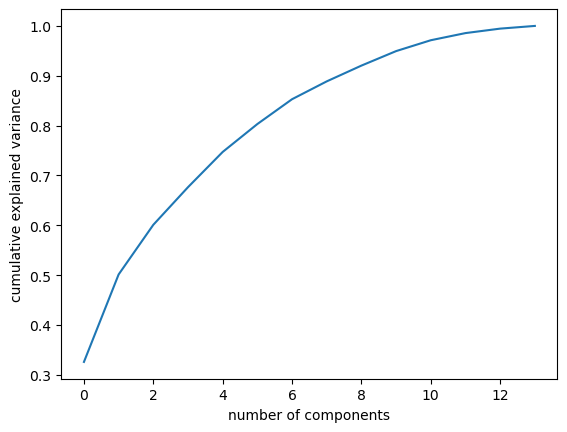

In [4]:
pca = PCA().fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [5]:
# set cunulative variance to 0.85
# code recommends 7 PCAs
pca = PCA(n_components=0.85)
pcadf = pca.fit_transform(df_scaled)
k = pca.n_components_
pca.n_components_


7

In [6]:
# the optimal number of principal components (as we know from the previous line = 7 for this data)
pca = PCA(n_components = k)
pcadf_opt= pca.fit_transform(df_scaled)
pcadf_opt = pd.DataFrame(pcadf_opt, 
                         columns=['PC'+str(i) for i in range(1,pcadf_opt.shape[1]+1)])
pcadf_opt.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.148956,-0.384124,0.280998,-0.006309,-0.160381,-0.110348,-0.131943
1,-0.279697,-0.364913,0.143422,-0.094354,0.193422,-0.056655,-0.068409
2,-0.227926,-0.331586,0.074874,-0.161808,0.276295,0.317779,-0.070257
3,-0.247945,-0.482012,0.045882,0.522469,0.351831,-0.037382,0.340705
4,0.912876,0.224971,-0.345861,0.161002,-0.084510,0.393971,0.619480


In [7]:
# we limit the number to the first two principal components as we want to plot clusters in 2d-space
pca = PCA(2)
pcadf_fix2 = pca.fit_transform(df_scaled)
pcadf_fix2 = pd.DataFrame(pcadf_fix2, 
                          columns=['PC'+str(i) for i in range(1,pcadf_fix2.shape[1]+1)])
pcadf_fix2.head(5)

,PC1,PC2
0,-0.148956,-0.384124
1,-0.279697,-0.364913
2,-0.227926,-0.331586
3,-0.247945,-0.482012
4,0.912876,0.224971


In [8]:
# To perform kmeans clustering we need to transform the dataframe into an array. 

# X = pca-reduced dataset with 7 PCAs (recommended number)
# Y = pca-reduced dataset with 2 PCAs (fixed numer for visualisation) - this is taken in the following

X = pcadf_opt.values 
Y = pcadf_fix2.values 


### 2. k-means Clustering

Now, the  k-means CLustering can be applied. First we need to determine the **number of clusters k** with the Elbow Plot. The Elbow Plot is used to find the optimal number of clusters.  

# Application for 2 PCAs (Y dataset) due to visualisation

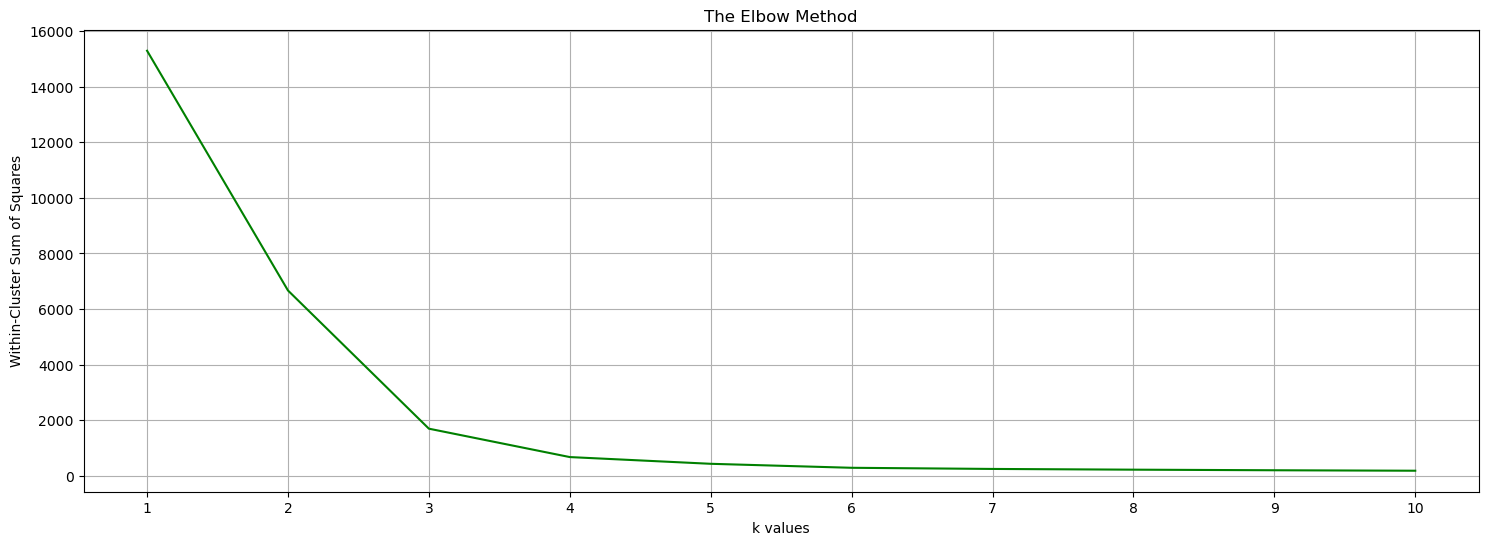

In [9]:
# Ignore future warnings 
import warnings
warnings.filterwarnings("ignore")

#finding the optimal number of cluster value
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_score = []

# use Y for dataset with 2 PCAs 
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    inertia_score.append(kmeans.inertia_)

#Visualizing the inertia vs k plot
plt.figure(figsize=(18,6))
sns.lineplot(x=range(1,11),y=inertia_score,color='green')
plt.xticks(range(1,11))
plt.xlabel('k values')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('The Elbow Method')
plt.grid()
plt.show()




In [10]:
# k-means algorithm is applied on the data set.
# n-clusters: 3 (fixed value for visualisation)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init = 'k-means++', n_init = 10, tol = 1e-4, 
                random_state=0) 
kmeans.fit(Y)


KMeans(n_clusters=3, random_state=0)

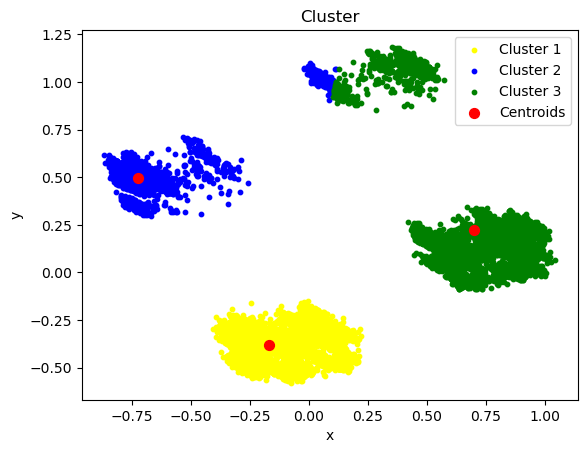

In [11]:
# Visulization of the clustering 
m_kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= m_kmeans.fit_predict(Y)

plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 10, c = 'yellow', 
            label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 10, c = 'blue', 
            label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 10, c = 'green', 
            label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, 
            c = 'red', label = 'Centroids')
plt.title('Cluster')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 3. Evaluation

Typical objective functions in clustering formalize the goal of attaining high intra-cluster similarity and low inter-cluster similarity. This is an internal criterion for the quality of a clustering. To measure the quality we use the **inertia score** and **silhouette score**. 

Inertia Score: 
- Not a normalized metric.
- Lower values tend to fit the model better and zero is optimal. 
- Curse of high dimensionality: in very high-dimensional spaces, euclidean distances tend to become inflated



In [12]:
#caclulate silhouette for k=3 which was recommended from elbow plot above
km = KMeans(n_clusters=3)
km.fit(Y)
print(f'Inertia Score is {km.inertia_}')
print(f'Silhouette Score is {silhouette_score(Y,km.labels_)}')



Inertia Score is 1692.1347020998273
Silhouette Score is 0.7854320447718499


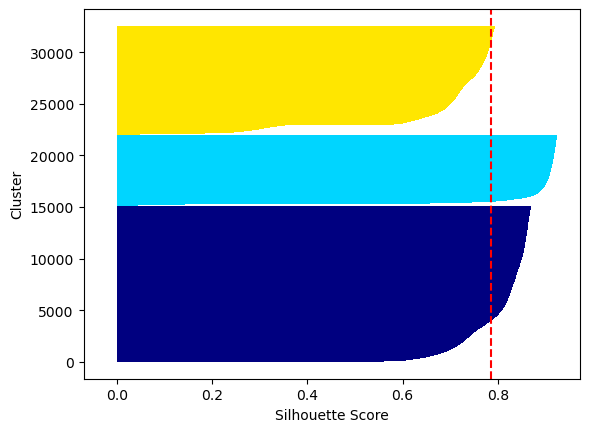

In [13]:
# Visualization of Silhouette Score for k=3 


cluster_labels = np.unique(y_kmeans)
n_clusters = cluster_labels.shape[0]


silhouette_vals = silhouette_samples (Y, 
                                     y_kmeans, metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_kmeans == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet( i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2 )
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = "--")
plt.ylabel('Cluster')
plt.xlabel('Silhouette Score')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6088955406862742
For n_clusters = 3 The average silhouette_score is : 0.7854320447718499
For n_clusters = 4 The average silhouette_score is : 0.8254431597080323
For n_clusters = 5 The average silhouette_score is : 0.7234140592476068
For n_clusters = 6 The average silhouette_score is : 0.6585460026490111


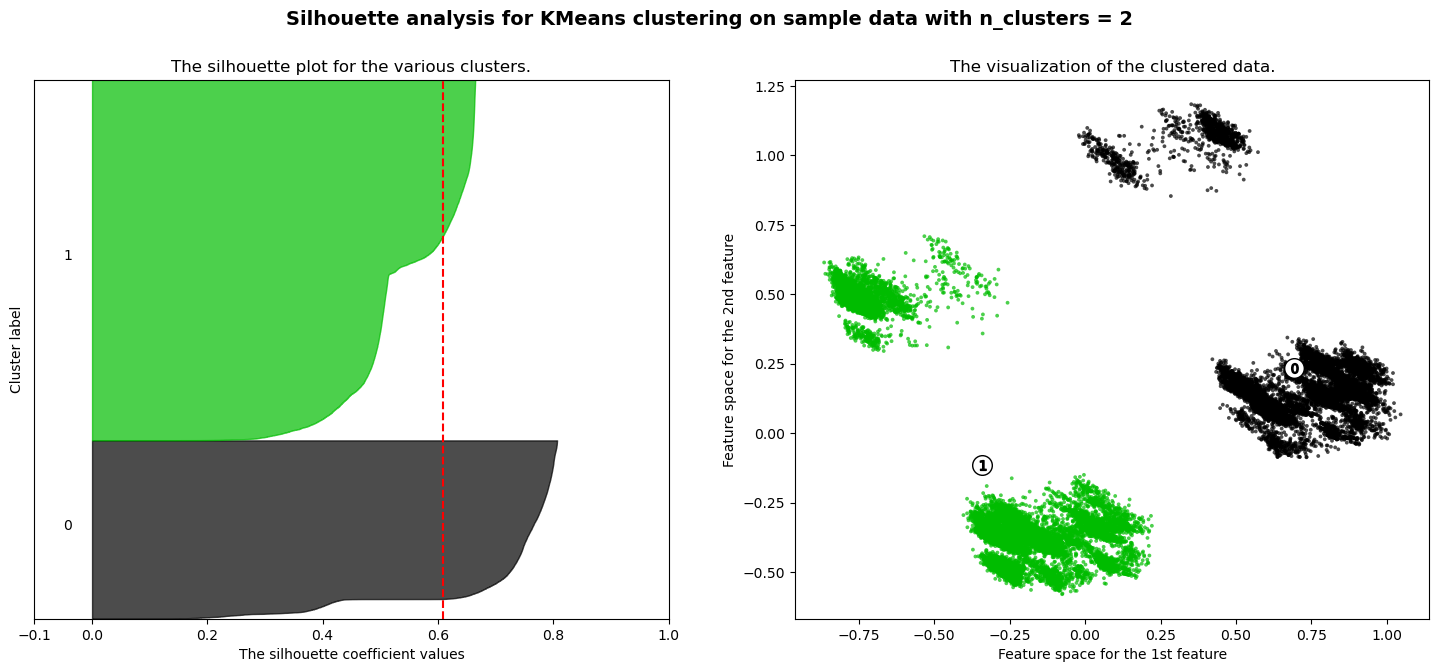

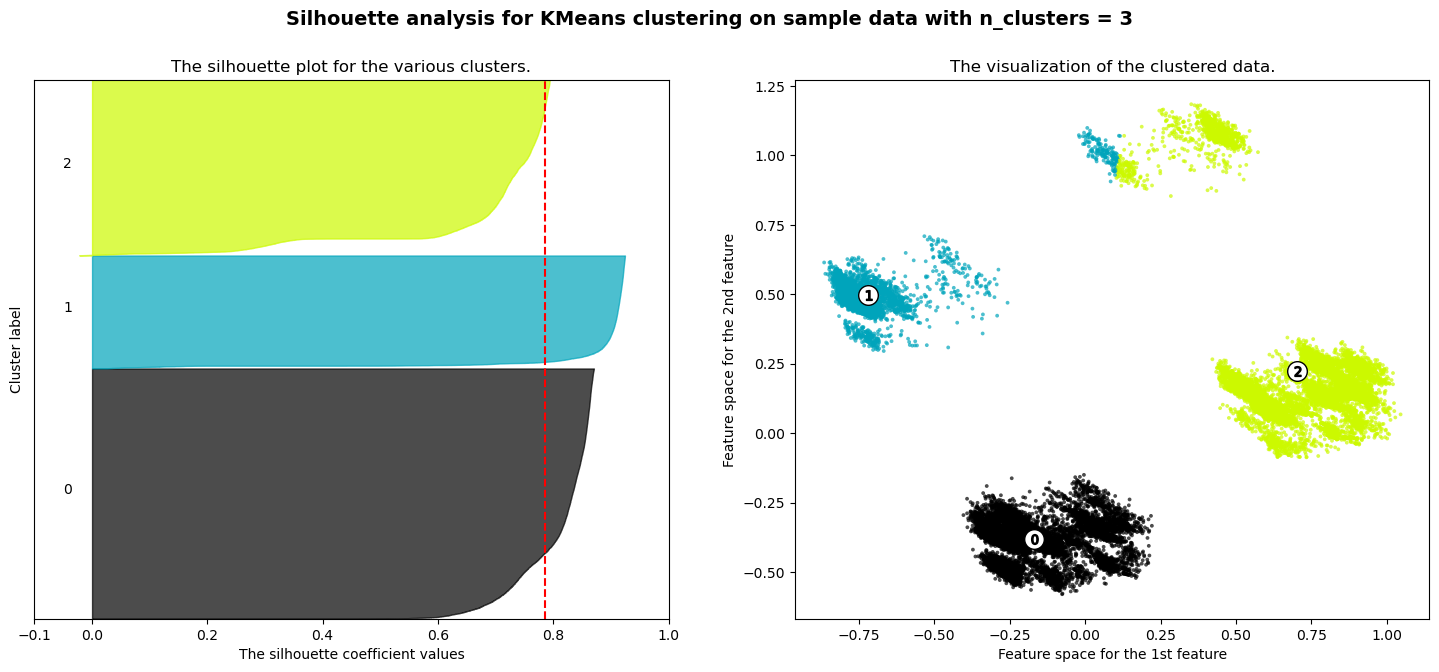

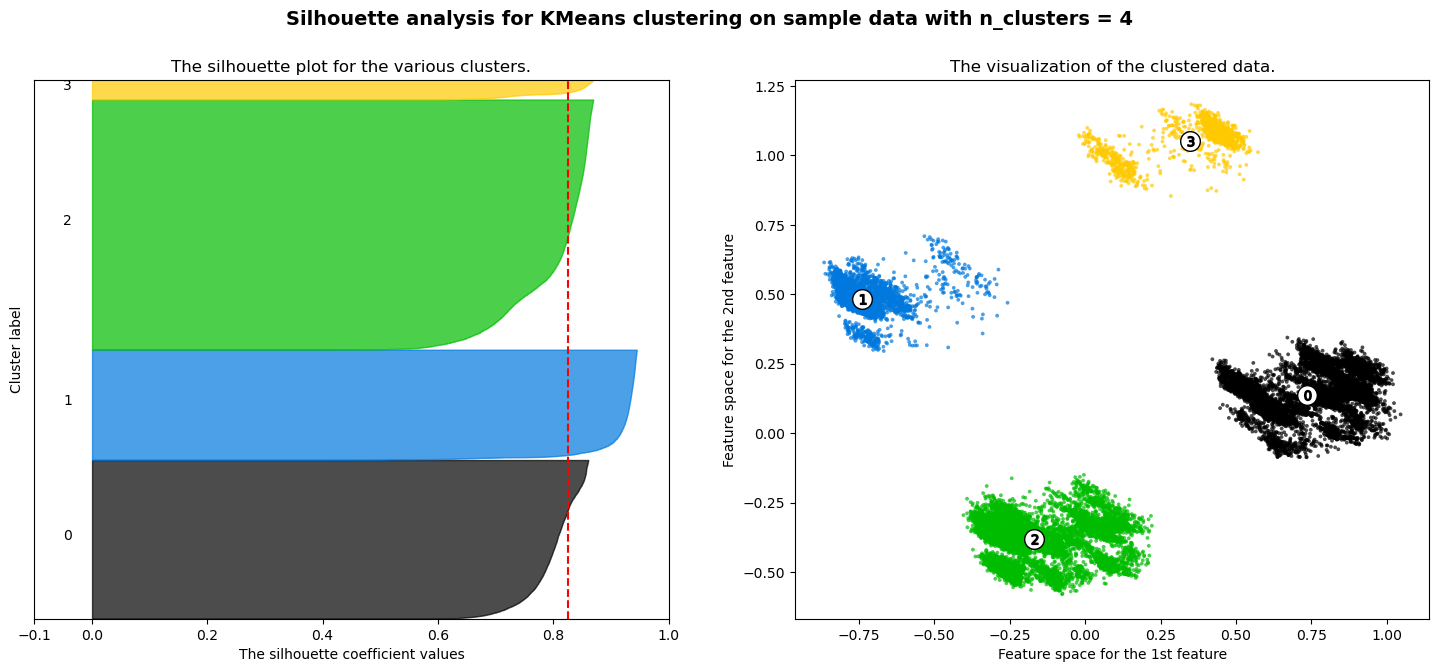

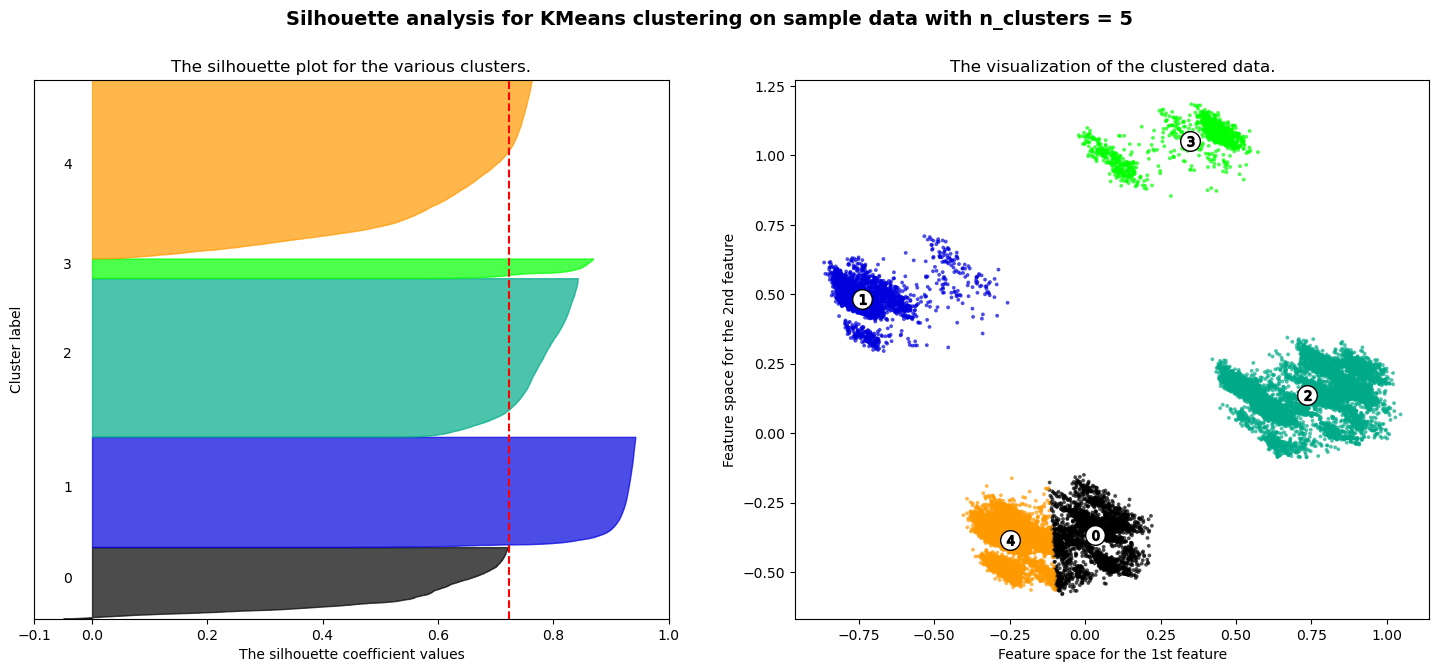

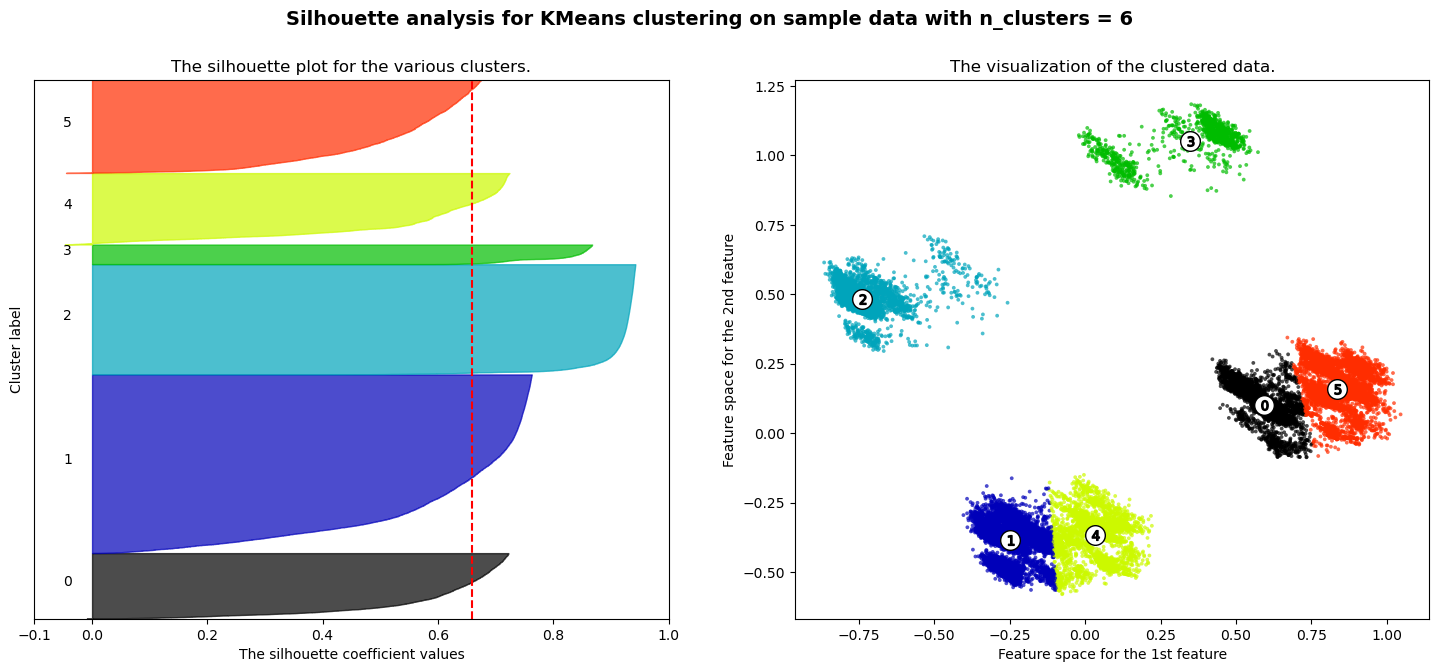

In [14]:
# To find the optimal k clusters, the silhouette score for n = (2,3,4,5,6) is computed and visualized 
# Y dataset was used again (datasets with 2 PCAs) --> students should try on the recommended PCA at home, 2 PCA can be shown as visualisation

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Y) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Y)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Y[:, 0], Y[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Now we have found the optimal number of k=4 clusters and apply the finding to our model.

In [15]:
# results from previous silhouette shows that k=4 has the maximum silhouette score
#altes y_kmeans von oben wird überschrieben
m_kmeans = KMeans(n_clusters= 4, random_state=10)
y_kmeans= m_kmeans.fit_predict(Y)

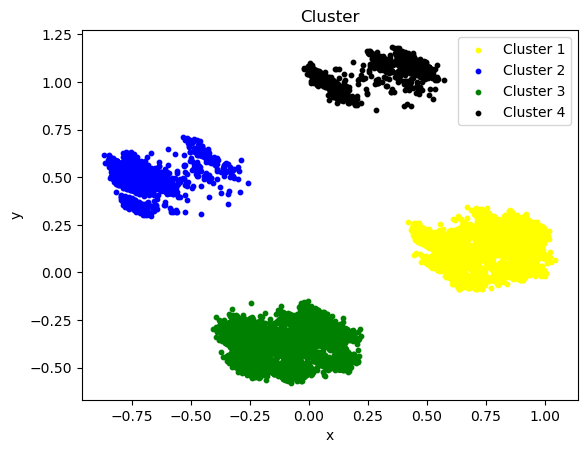

In [16]:
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 10, c = 'yellow', 
            label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 10, c = 'blue', 
            label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 10, c = 'green', 
            label = 'Cluster 3')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 10, c = 'black', 
            label = 'Cluster 4')
plt.title('Cluster')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 4. Export dataset 

Now, we want to get a csv file with the assigned clusters. Firstly, we need to convert the arrays into dataframe. Second, we merge the dataframes. 

In [17]:
# output cluster label are generated into the Y dataset with 2 PCA
# for X (optimised 7-PCA calculation) kMeans has to be separetely applied based on X-dataset 

data = pd.DataFrame(Y, columns=['PC'+str(i) 
                                for i in range(1, pcadf_fix2.shape[1]+1)])
y_kmeans = pd.DataFrame(y_kmeans)
data['Cluster_Labels'] = y_kmeans
data

,PC1,PC2,Cluster_Labels
0,-0.148956,-0.384124,2
1,-0.279697,-0.364913,2
2,-0.227926,-0.331586,2
3,-0.247945,-0.482012,2
4,0.912876,0.224971,0
...,...,...,...
32550,0.875261,0.222590,0
32551,-0.735774,0.442958,1
32552,0.910564,0.132032,0
32553,0.089516,-0.382998,2


In [18]:
df_scaled['Cluster_Labels'] = y_kmeans
df_scaled.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Cluster_Labels
0,0.301370,0.875,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220,0.0,2.0
1,0.452055,0.750,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220,0.0,2.0
2,0.287671,0.500,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220,0.0,2.0
3,0.493151,0.500,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220,0.0,2.0
4,0.150685,0.500,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951,0.0,0.0


In [19]:
#csv-writer
from pathlib import Path  

filepath = Path('kMeans_output.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_scaled.to_csv(filepath)  